In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.model_selection
import albumentations as A
import cv2
import itertools
import os
import time
from pathlib import Path
from tqdm.notebook import tqdm
import math
import pickle
from scipy import ndimage
import random
# pytorch stuff
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tifffile import imsave
# need for AMP
from torch.cuda.amp import autocast
from torch.cuda.amp import GradScaler

torch.manual_seed(3)
from tqdm.notebook import tqdm

In [2]:
check=np.load('extracted1.npy')

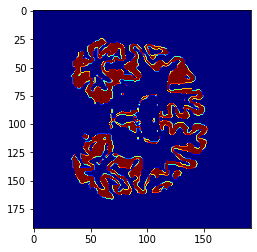

In [103]:
brain=np.argmax(check[1],axis=0)
plt.imshow(brain[100,:,:]==2,cmap='jet') #Get grey matter

# Read Target Data for check on matter type

In [106]:
data=pd.read_pickle('/home/jott2/brainlabs/ParcellationData/ALL_DATA_Final_w0.pkl')
print(data['filenames'][0])
braintarg=np.load(data['npy_file_loc'][0])

sub-ADNI002S0295_ses-M36_T1w


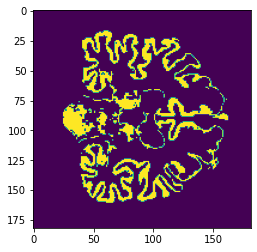

In [80]:
plt.imshow(braintarg[:,100,:]>0) #Not the same brain 

In [184]:
def unpack_segs(file_loc):
    table=pd.read_csv(f'extracted{0}.csv')
    for i in range(1,77):
            val=pd.read_csv(f'extracted{i}.csv')
            brains=np.load(f'extracted{i}.npy')
            table=pd.concat([table,val])
            for j in range(len(val)):
                print(val['0'][j])
                name=val['0'][j]
                seg=(np.argmax(brains[j],axis=0)==2)
                np.save(f'{file_loc}{name}_seg.npy',seg)

    table=table.rename(columns={"Unnamed: 0": "old_index", "0": "Filename"})
    table=table.drop('old_index',axis=1)
    table=table.reset_index(drop=True)    
    return table
            
        

In [ ]:
unpack_segs('/home2/wamri/brainlabs/Brainwork/seg_mri/')